In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
from tensorflow.keras.layers.experimental import preprocessing
import math

In [2]:
print(tf.__version__) # 2.4.1
print(keras.__version__) # 2.4.0

2.6.0
2.6.0


In [3]:
# Some helping function definitions
def create_data(csv):
    b=1000
    f = open(csv,'w')
    f.write("x1;x2;y\n")
    foctors =[1000,2000,3000,4000,5000]
    for factor in foctors:
        for i in range(361):
            y=int(b+factor*math.sin(i*math.pi/180))
            f.write(str(factor) + ";"+ str(i) + ";" + str(y) +"\n")
    f.close()
    return(csv)

In [4]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='training_loss')
    plt.plot(history.history['val_loss'], label='validation_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [y]')
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
def plot_prediction_comparison(pred_a, pred_b):
    lmin = min(min(pred_a), min(pred_b))
    lmax = max(max(pred_a), max(pred_b))
    plt.figure()
    a = plt.axes(aspect='equal', title='Values predicted by Tensorflow')
    plt.scatter(pred_a, pred_b)
    plt.xlabel('True Values [Y]')
    plt.ylabel('Predictions [Y]')
    lims = [lmin, lmax]
    plt.xlim(lims)
    plt.ylim(lims)
    plt.plot(lims, lims)
    plt.show()

In [6]:
# Create Sample Data
csv_file=create_data("sinx.csv")
dataset = pd.read_csv(csv_file,sep=';', header=0)

In [7]:
column_names = list(dataset.columns)
objectiveFunction = column_names[-1] # The last column will be label (output)

In [8]:
# Prepare train and test data
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop(objectiveFunction)
test_labels = test_features.pop(objectiveFunction)

In [23]:
# A DNN regression
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
model = tf.keras.models.Sequential()
model.add(normalizer)
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(32,activation="relu"))
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dense(8,activation="relu"))
model.add(tf.keras.layers.Dense(1))
model.compile(loss="mean_absolute_error",optimizer=tf.keras.optimizers.Adam(0.0001))

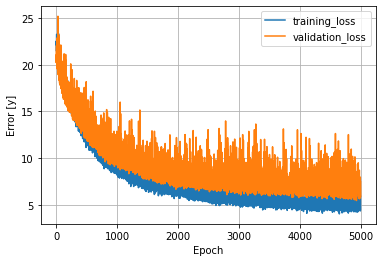

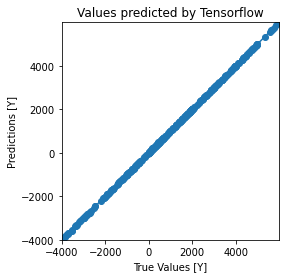

[[2000.1201]]


In [25]:
history = model.fit(train_features, train_labels,validation_split=0.2,verbose=0,epochs=5000)
plot_loss(history)
test_predictions = model.predict(test_features).flatten()
plot_prediction_comparison(test_labels, test_predictions)
test_1p=[[1000,90]] # x1=1000,x2=90 given by user
print(model.predict(test_1p))

**Questions:**
1. How can we further improve the model prediction, for example:
    * a. Increase number of neurons, e.g. 128
    * b. Increase number of hidden layers, e.g. use 8 layers instead of 2 hidden layers
    * c. Increase number of epochs from 5000 to 10000

# My Intuition

I observed the model architecture it seems very simple only with 2 hidden layer. Due this after 1000 epochs error rate seems consistent. When incrase the complexity of the model by adding more hidden layers and number of neurons. After these settings, our model we tried not too much low learning rate and 1000 epochs. Due to this complexity increase in epochs lead to decrease in error rate